# iAR package Demo - CIAR Model

In [1]:
import iar
import numpy as np
import matplotlib.pyplot as plt
print("iAR version:")
print(iar.__version__)

iAR version:
1.0.0


# Simulates from a CIAR Model

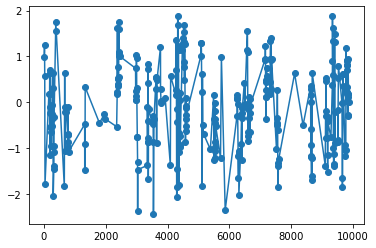

In [2]:
from iar import CIAR_sample,gentime
np.random.seed(6713)
sT=gentime(n=300)
y,sT,Sigma =CIAR_sample(n=300,sT=sT,phi_R=0.9,phi_I=0.0,rho=0,c=1)

plt.plot(sT,y,"o-")
plt.show()

# Maximum Likelihood Estimation of the CIAR Model

In [3]:
from iar import CIAR_phi_kalman,CIAR_kalman
y1=y/np.sqrt(np.var(y,ddof=1))
out=CIAR_phi_kalman(x=[0.9,0],y=y1,t=sT,c=1,yerr=np.zeros(len(y1)))
print(out)

0.4547633726894933


In [4]:
phi_R,phi_I,out=CIAR_kalman(y=y1,sT=sT,c=1,niter=4,seed=6713)
print(phi_R)
phi=complex(phi_R, phi_I)
Mod=abs(phi)
print(Mod)

0.8847548038932896
0.8847548038932929


# Simulates a Negatively Correlated CIAR Model

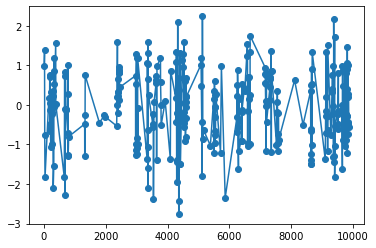

In [5]:
np.random.seed(6713)
sT=gentime(n=300)
y,sT,Sigma =CIAR_sample(n=300,sT=sT,phi_R=-0.9,phi_I=0.0,rho=0,c=1)

plt.plot(sT,y,"o-")
plt.show()

In [6]:
y1=y/np.sqrt(np.var(y,ddof=1))
phi_R,phi_I,out=CIAR_kalman(y=y1,sT=sT,c=1,niter=4,seed=6713)
print(phi_R)
phi=complex(phi_R, phi_I)
Mod=abs(phi)
print(Mod)

-0.8949363787223611
0.8950373367171874


# Forecast with CIAR Model

In [7]:
from iar import CIAR_forecast
sT=gentime(n=100)
y,sT,Sigma =CIAR_sample(n=100,sT=sT,phi_R=0.9,phi_I=0.0,rho=0,c=1)
y1=y/np.sqrt(np.var(y,ddof=1))
n=len(sT)
p=int(0.9*n)
ytr=y1[range(p)]
str=sT[range(p)]
yte=y1[range(p,n)]
ste=sT[range(p,n)]
n_ahead=ste-str[p-1]
n_ahead2=np.zeros(1)

final=np.zeros(shape=(len(n_ahead),4))
for i in range(10):
    print(i)
    phi_R,phi_I,out=CIAR_kalman(y=ytr,sT=str,c=1,niter=4,seed=6713)
    n_ahead2[0]=ste[i]-str[len(str)-1]
    print(n_ahead2)
    fitted,forCIAR,Lambda2,Sighat2=CIAR_forecast(phi_R,phi_I,ytr,str,n_ahead=n_ahead2)
    final[i,]=np.hstack((phi_R,yte[i],forCIAR,n_ahead2))
    ytr=np.hstack((ytr,yte[i]))
    str=np.hstack((str,ste[i]))

0
[6.27126003]
1
[2.68876825]
2
[5.43555209]
3
[24.83037379]
4
[2.63890857]
5
[3.56624485]
6
[1.50086124]
7
[1.46636626]
8
[11.7530553]
9
[4.35800789]


In [8]:
import pandas as pd
forecast=pd.DataFrame(final,columns=["phi","Observed Value","Forecasted Value","Time Gap"])
forecast

,phi,Observed Value,Forecasted Value,Time Gap
0,0.906679,0.595008,-0.706422,6.271260
1,0.907735,0.710479,0.176914,2.688768
2,0.904791,0.434513,0.459418,5.435552
3,0.905962,0.030408,0.046964,24.830374
4,0.906793,0.353312,0.028872,2.638909
5,0.906846,-0.378589,0.271383,3.566245
6,0.907657,-0.115781,-0.228764,1.500861
7,0.907553,-0.022449,-0.101043,1.466366
8,0.908427,-1.659111,0.035333,11.753055
9,0.909558,0.418836,-0.546968,4.358008


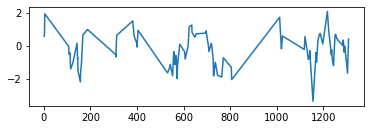

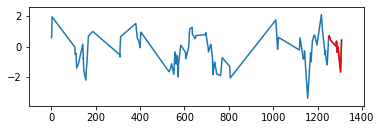

In [9]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.plot(sT, y1)
plt.show()
plt.subplot(212)
plt.plot(str, ytr)
plt.axis([-n, np.max(sT)+n, np.min(y1)-0.5, np.max(y1)+0.5])
plt.plot(ste, yte,color='red')
plt.show()

[-0.7064219   0.17691418  0.4594181   0.04696353  0.02887227  0.2713827
 -0.22876412 -0.10104309  0.03533264 -0.54696763]
[ 6.27126003  2.68876825  5.43555209 24.83037379  2.63890857  3.56624485
  1.50086124  1.46636626 11.7530553   4.35800789]


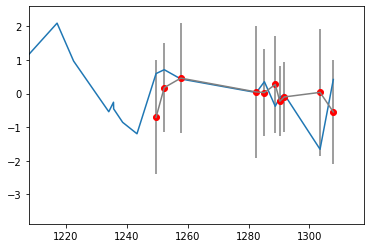

In [10]:
import scipy.stats
print(final[range(10),2])
print(final[range(10),3])
yerr=scipy.stats.norm.ppf(0.975)*np.sqrt(1-Mod**(2*final[range(10),3]))
plt.plot(str, ytr)
plt.axis([np.max(str)-100, np.max(str)+10, np.min(y1)-0.5, np.max(y1)+0.5])
#plt.plot(ste[range(10)], yte[range(10)],"o",color='red')
plt.plot(ste[range(10)], final[range(10),2],"o",color='red')
plt.errorbar(ste[range(10)], final[range(10),2], yerr=yerr,color="gray")
plt.show()